# Работа с временными признаками

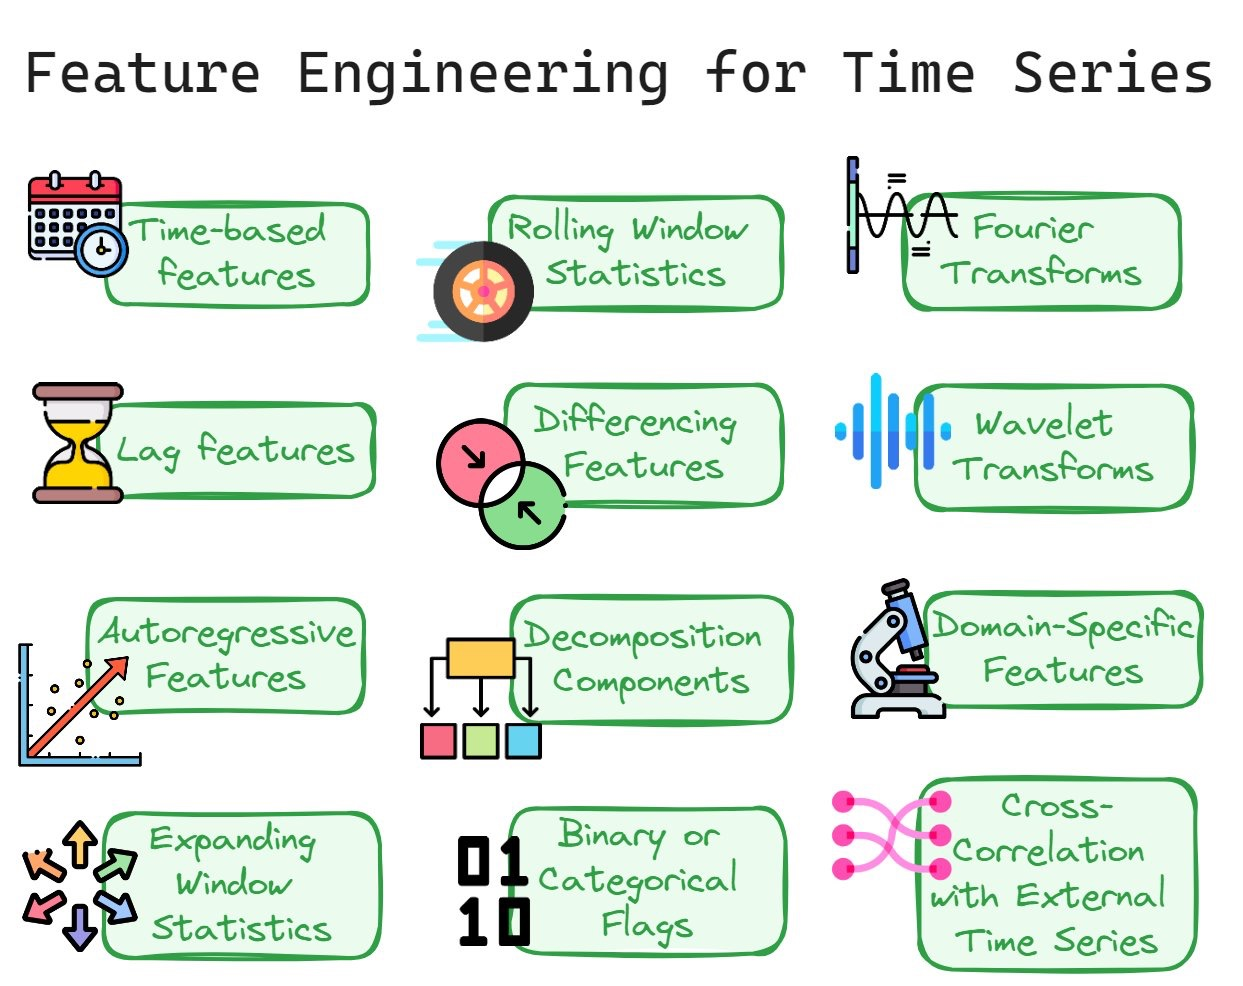

Временные метки могут быть отличным источником полезных признаков для моделей машинного обучения, так как они часто содержат скрытые закономерности, связанные с сезонностью, суточными циклами, днями недели и другими факторами. Вот основные подходы и признаки, которые можно извлечь из временных меток:

**1. Базовые признаки даты и времени**

* Год (Year): Может быть полезным, если данные охватывают несколько лет и в них есть тенденции или изменения со временем.
Месяц (Month): Часто используется в задачах с сезонностью, например, в продажах, туризме и т. д.

* День месяца (Day): Полезен в задачах, связанных с конкретными днями месяца, например, в периодах высокой нагрузки (в начале и конце месяца).

* День недели (Day of Week): Применяется, когда поведение зависит от дня недели, например, различия между выходными и будними днями.

* Час (Hour): Суточные колебания важны в таких задачах, как анализ спроса, посещаемости, активности пользователей и т. д.

* Минута и секунда (Minute, Second): Обычно используются для высокочастотных данных, когда важен временной интервал в пределах часа (например, в финансовых или IoT-данных).

**2. Бинарные признаки**

Эти признаки показывают, принадлежит ли временная метка определенной категории:

* Признак выходного дня (Is Weekend): Бинарный признак, указывающий, является ли день выходным (суббота или воскресенье).

* Признак праздника (Is Holiday): Может указывать, приходится ли дата на праздничный день. Данные о праздниках могут быть загружены для конкретной страны или региона.

* Час пик (Is Rush Hour): Может быть полезен в транспортных данных или в задачах, связанных с пиковыми периодами нагрузки (утро и вечер в будни).

**3. Сезонные признаки**

* Сезон (Season): Признак, указывающий сезон (зима, весна, лето, осень). Особенно полезен в задачах с погодой или данными о сельском хозяйстве.

* Квартал года (Quarter): Годовой квартал (1, 2, 3 или 4), что может быть полезно в данных, где квартальные отчеты или циклы важны, например, в финансовом секторе.

**4. Циклические признаки**

* Некоторые признаки (например, день недели, месяц, час) имеют циклический характер. Для их корректного представления можно использовать синус и косинус, чтобы модель правильно учитывала цикличность.

* Признаки синус и косинус: Это преобразование важно, поскольку, например, за 23:00 идет 0:00, и разница между ними по циклу должна быть минимальной.

```
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
```

**5. Признаки временного интервала**

* Прошло времени с начала (Time Since Start): Показывает, сколько времени прошло с начала определенного периода. Например, сколько дней прошло с начала года.

* Прошло времени с последнего события (Time Since Last Event): Важно в задачах, где нужно учитывать, когда произошло предыдущее событие. Например, как давно клиент посещал магазин.

**6. Скользящие и агрегированные статистики**

На основе временных меток можно создать статистику по предыдущим или будущим периодам, особенно полезную в задачах прогнозирования:

* Среднее значение за период (Rolling Mean): Среднее значение целевой переменной за последние n дней или часов.

* Сумма за период (Rolling Sum): Сумма значений целевой переменной за определенный временной промежуток.

* Максимум и минимум за последние n дней или часов.
Эти признаки используются для сглаживания данных и выявления общих тенденций.

**7. Тренд и сезонность**

Если у вас есть временные ряды, можно извлечь компоненты тренда и сезонности. Эти признаки особенно важны для задач прогнозирования временных рядов. Компоненты тренда и сезонности могут быть выделены с помощью таких методов, как декомпозиция STL (Seasonal-Trend decomposition using Loess).

**8. Показатель активности**

* События в течение определенного периода: Подсчет количества событий за определенные периоды. Например, количество покупок пользователя за последнюю неделю.

* Среднее время между событиями: Например, среднее время между посещениями пользователя. Это помогает понять частоту взаимодействия.


In [ ]:
import pandas as pd
import numpy as np

# Пример данных
df = pd.DataFrame({
    'timestamp': pd.to_datetime(['2023-01-01 14:30:00', '2023-07-04 09:00:00', '2023-12-25 18:45:00'])
})

# Извлечение базовых признаков
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

# Бинарные признаки
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Суббота и воскресенье
df['is_holiday'] = df['timestamp'].dt.strftime('%m-%d').isin(['01-01', '07-04', '12-25']).astype(int)  # Пример праздников

# Циклические признаки
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

print(df)

            timestamp  year  month  day  day_of_week  hour  is_weekend  \
0 2023-01-01 14:30:00  2023      1    1            6    14           1   
1 2023-07-04 09:00:00  2023      7    4            1     9           0   
2 2023-12-25 18:45:00  2023     12   25            0    18           0   

   is_holiday  hour_sin      hour_cos     month_sin  month_cos  
0           1 -0.500000 -8.660254e-01  5.000000e-01   0.866025  
1           1  0.707107 -7.071068e-01 -5.000000e-01  -0.866025  
2           1 -1.000000 -1.836970e-16 -2.449294e-16   1.000000  


### Литература

* James D Hamilton, Time Series Analysis, 1994
Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс

* Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов, Учеб. пособие. М.: Финансы и статистика, 2003 г. - 416 с: ил., главы 1,4,5,7.

* Jonathan D. Cryer, Kung-Sik Chan, Time Series Analysis With Applications in R. Second Edition. Springer

* Bollerslev, Tim (1992). "ARCH Modeling in Finance: A Review of the Theory and Empirical Evidence". Journal of Econometrics. 52 (1–2): 5–59.

# Работа с геопризнаками

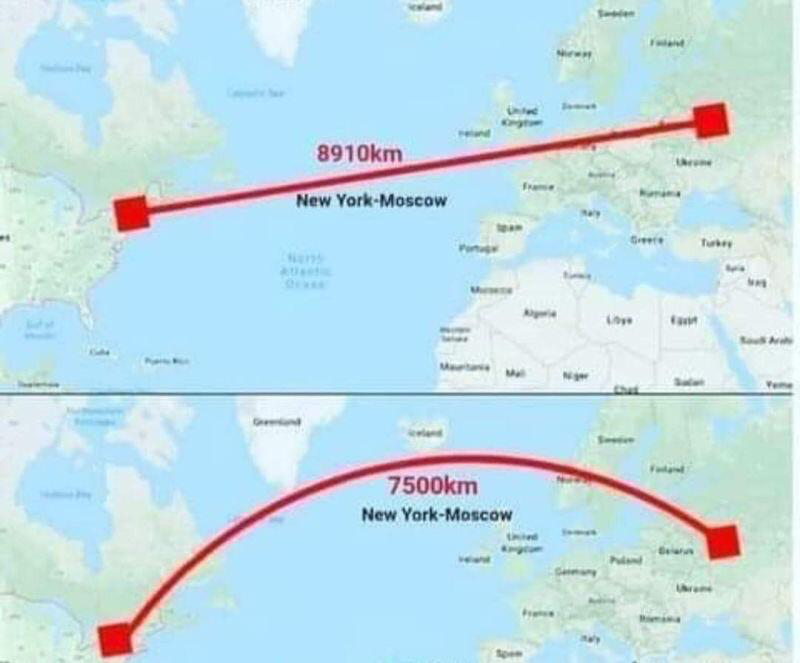

Извлечение информативных признаков из географических координат (широта и долгота) — важная задача в машинном обучении, особенно в задачах, связанных с пространственными данными (например, в предсказаниях в ритейле, анализе пользователей и геомаркетинге). Давай рассмотрим основные методы, которые помогают извлекать полезные признаки из координат.

**1. Признаки расстояния**

Расстояние до определенных точек:

* Рассчитать расстояние от каждой точки до известных местоположений, таких как центр города, ближайший аэропорт или место конкурентов. Это можно сделать с помощью формулы Харверсина или встроенных функций библиотек (например, GeoPy).

* Расстояние между точками: Если объекты распределены по географии (например, магазины, офисы), можно рассчитать расстояние между ними, чтобы выявить кластеры и зоны высокой плотности.

**2. Кластеризация с помощью координат**

* Кластеризация методом K-средних: Применение алгоритма KMeans к широте и долготе позволяет разделить объекты на кластеры, представляющие географические регионы. Результат будет особенно полезен для создания категорий по расположению.

* DBSCAN: Подходит для выявления плотных кластеров в данных. Например, можно найти группы точек (точки интереса, магазины) в зонах высокой плотности и добавить в модель признак принадлежности к кластеру.

**3. Признаки сетки (grid features)**

* Квадратная сетка: Разделение всей территории на ячейки фиксированного размера (например, 0.1° × 0.1°). Каждой точке присваивается категория, соответствующая ее ячейке. Такой метод позволяет легко учитывать региональные различия в модели.

* Географическая сетка H3: H3 – это геокодировочная система, которая делит Землю на шестиугольники разного размера. Этот метод удобен для создания признаков на основе принадлежности точки к определенной ячейке и учитывает географические расстояния.

**4. Признаки на основе расстояния и направления**

* Азимут (угол направления): Если важно направление от одной точки к другой, можно вычислить азимут — угол направления относительно северного полюса. Этот признак может помочь, например, в анализе маршрутов.

* Векторные признаки: Широту и долготу можно разложить на синус и косинус для создания векторных признаков. Это полезно для задач, где важно направление, особенно при анализе дорожных данных.

**5. Координаты с привязкой к времени**

* Временные признаки: Для задач, где данные зависят от времени (например, частота посещений по дням недели), можно добавить временные признаки. Например, широта-долгота-день недели или широта-долгота-время суток позволяют учитывать временные закономерности в пространственных данных.

* Тепловая карта по времени: Анализ плотности координат в зависимости от времени (например, плотность поездок такси в час пик).

**6. Региональные признаки**

* Кодирование адресов и административных границ: Преобразование широты и долготы в почтовые индексы, районы или другие административные зоны. Примером может быть использование обратного геокодирования для получения региона или типа зоны (жилой район, коммерческая зона).

* Социально-демографические признаки региона: Можно дополнительно загрузить статистические данные для районов (доходы, население, инфраструктура) и присвоить эти данные точкам в зависимости от их местоположения.

**7. Топографические признаки**

* Высота над уровнем моря: Если для задачи важны особенности рельефа, то можно извлечь высоту над уровнем моря.

* Тип рельефа или покрытия: Использование данных о типе местности (город, сельская местность, пустыня, лес). Такие данные можно добавить с использованием карт или спутниковых данных.

**8. Координаты как точка на сфере**

* Полярные координаты: Можно рассматривать широту и долготу как точки на сфере и создавать полярные признаки. Например, если данные относятся к глобальному масштабу, это может быть более корректным представлением, чем простое использование евклидовых расстояний.

* Трансформация в метрическую систему: Преобразование географических координат в метры по отношению к определенной точке. Это удобно, если данные сосредоточены в пределах небольшого региона и важно точное расстояние.

In [ ]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

## Пример использования нескольких методов в Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from geopy.distance import geodesic # геодезическое расстояние между точками по поверхности Земли

# Пример данных
data = pd.DataFrame({
    'latitude': [55.751244, 55.755826, 59.934280],
    'longitude': [37.618423, 37.617635, 30.335098]
})

# Расстояние до центра Москвы
moscow_center = (55.751244, 37.618423)
data['distance_to_moscow_center'] = data.apply(lambda row: geodesic((row['latitude'], row['longitude']), moscow_center).km, axis=1)

# Кластеризация K-средних
kmeans = KMeans(n_clusters=2)
data['cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])

# Признаки синус-косинус для направления
data['lat_sin'] = np.sin(np.radians(data['latitude']))
data['lat_cos'] = np.cos(np.radians(data['latitude']))
data['lon_sin'] = np.sin(np.radians(data['longitude']))
data['lon_cos'] = np.cos(np.radians(data['longitude']))

print(data)

    latitude  longitude  distance_to_moscow_center  cluster   lat_sin  \
0  55.751244  37.618423                   0.000000        1  0.826602   
1  55.755826  37.617635                   0.512541        1  0.826647   
2  59.934280  30.335098                 635.035105        0  0.865451   

    lat_cos   lon_sin   lon_cos  
0  0.562787  0.610400  0.792093  
1  0.562721  0.610389  0.792102  
2  0.500993  0.505056  0.863086  


## Пример работы с реальным датасетом

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G' -O california.zip

--2024-11-07 08:29:30--  https://drive.google.com/uc?export=download&id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G
Resolving drive.google.com (drive.google.com)... 142.251.8.113, 142.251.8.102, 142.251.8.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G&export=download [following]
--2024-11-07 08:29:31--  https://drive.usercontent.google.com/download?id=15aOt64uBnVxnc9owPrEtFZEsfmTwZG5G&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409382 (400K) [application/octet-stream]
Saving to: ‘california.zip’

california.zip      100%[===================>] 399.79K  --.-KB/s    i

In [ ]:
!unzip california.zip -d /content

Archive:  california.zip
  inflating: /content/housing.csv    


In [ ]:
df = pd.read_csv("housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


longitude: A measure of how far west a house is; a higher value is farther west

latitude: A measure of how far north a house is; a higher value is farther north

housingMedianAge: Median age of a house within a block; a lower number is a newer building

totalRooms: Total number of rooms within a block

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

oceanProximity: Location of the house w.r.t ocean/sea

Посмотрим на распределения признаков

In [ ]:
numerical_features=list(df.columns)
numerical_features.remove('ocean_proximity')
numerical_features.remove('median_house_value')
print(numerical_features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

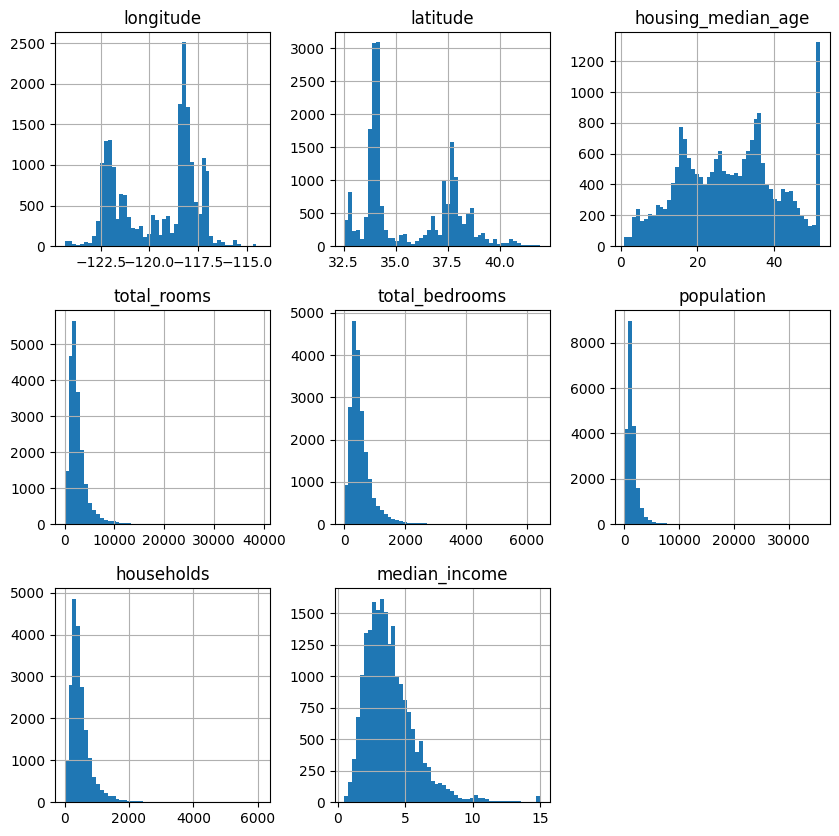

In [ ]:
df[numerical_features].hist(bins=50, figsize=(10, 10))

Прологарифмируем скошенные по распределению признаки

In [ ]:
skewed_features=['households','median_income','population', 'total_bedrooms', 'total_rooms']

log_numerical_features=[]

for f in skewed_features:
    df[f + '_log']=np.log1p(df[f])
    log_numerical_features.append(f + '_log')

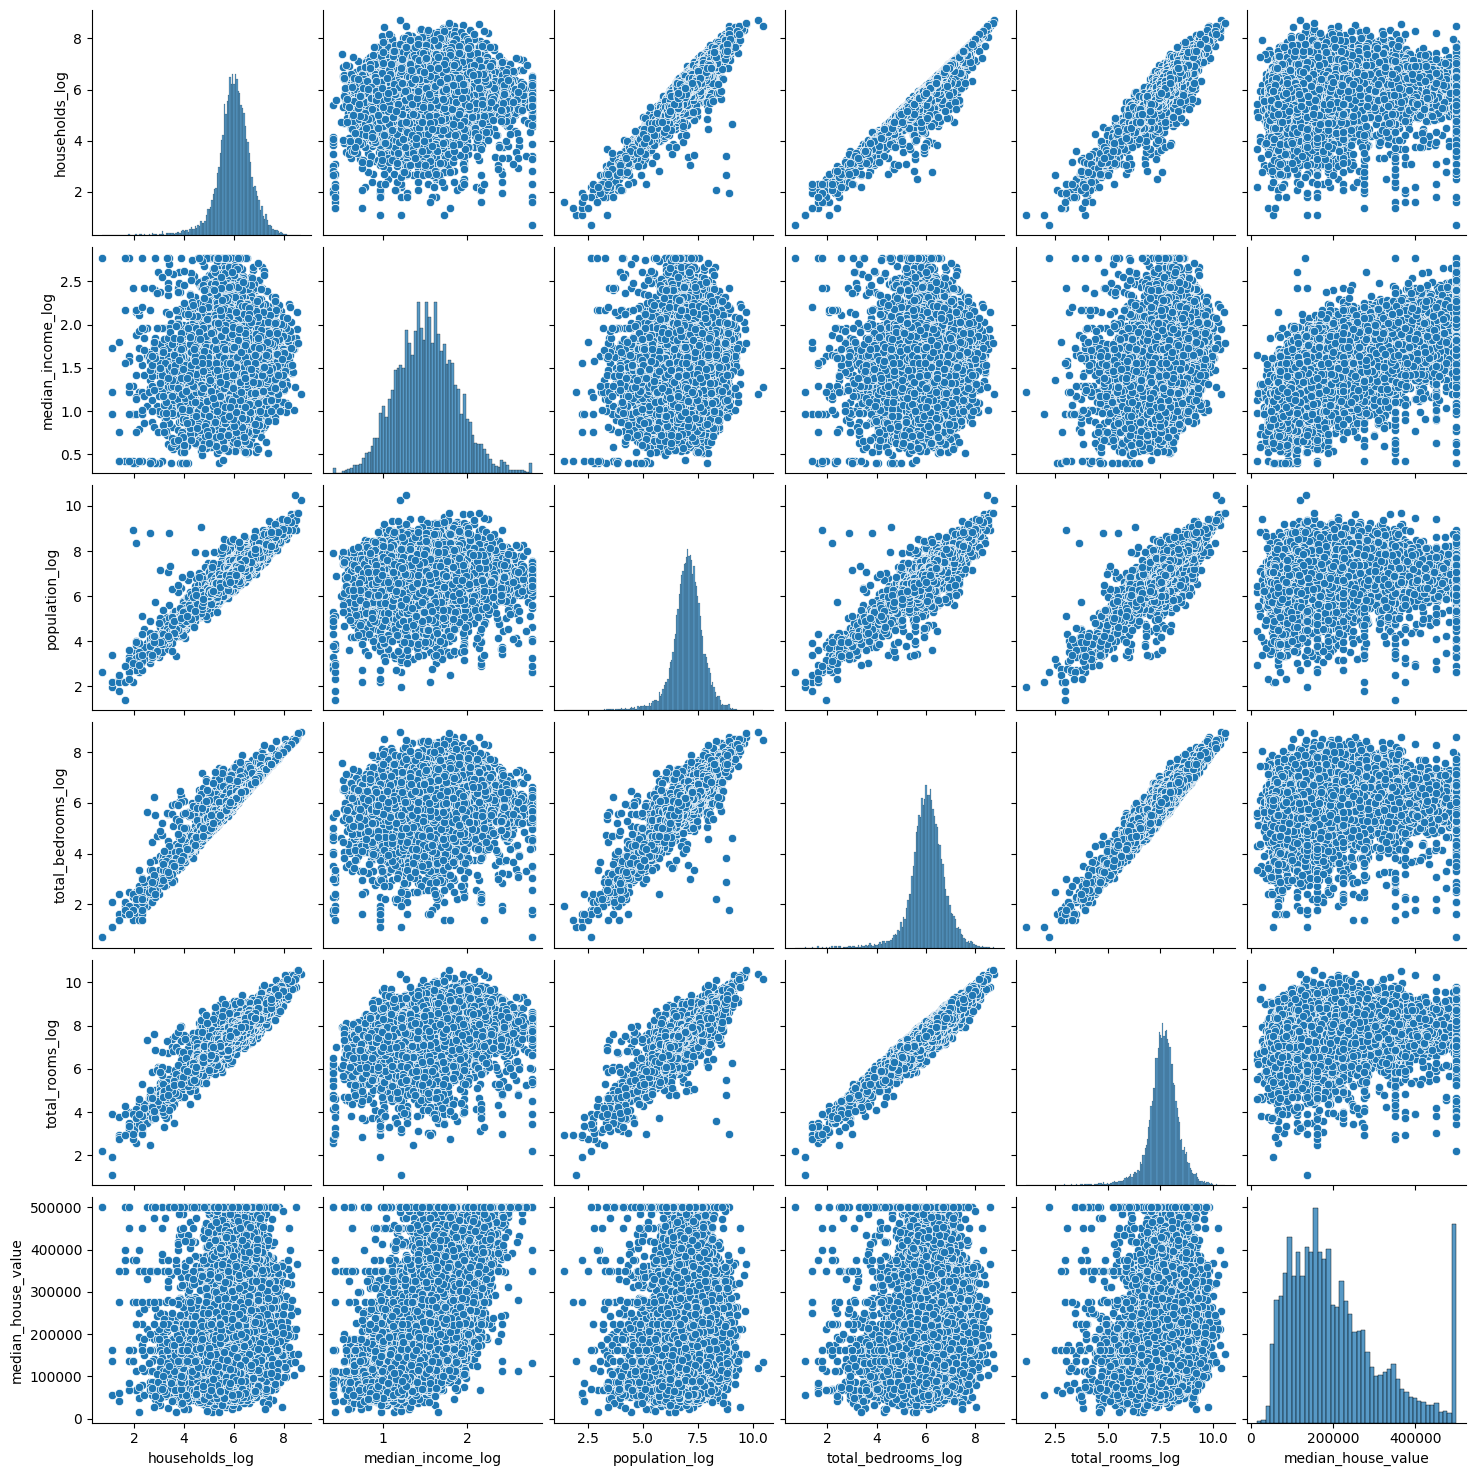

In [ ]:
# pairplot
import seaborn as sns

sns.pairplot(df[log_numerical_features+['median_house_value']])

### Разбиение на группы по близости к точке интереса (аэропорт, вокзал, крупный ТЦ и тд)

Data points within threshold: 635


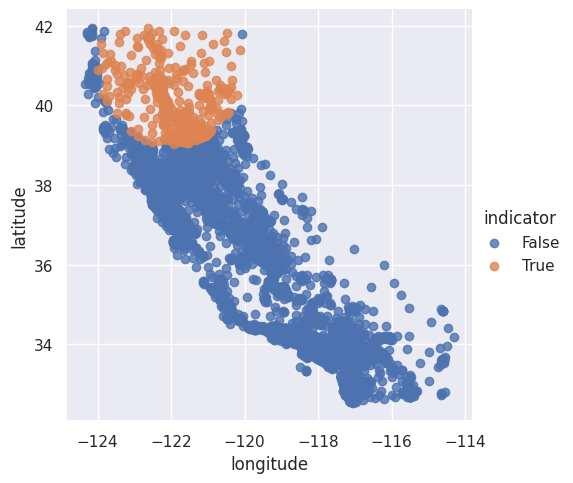

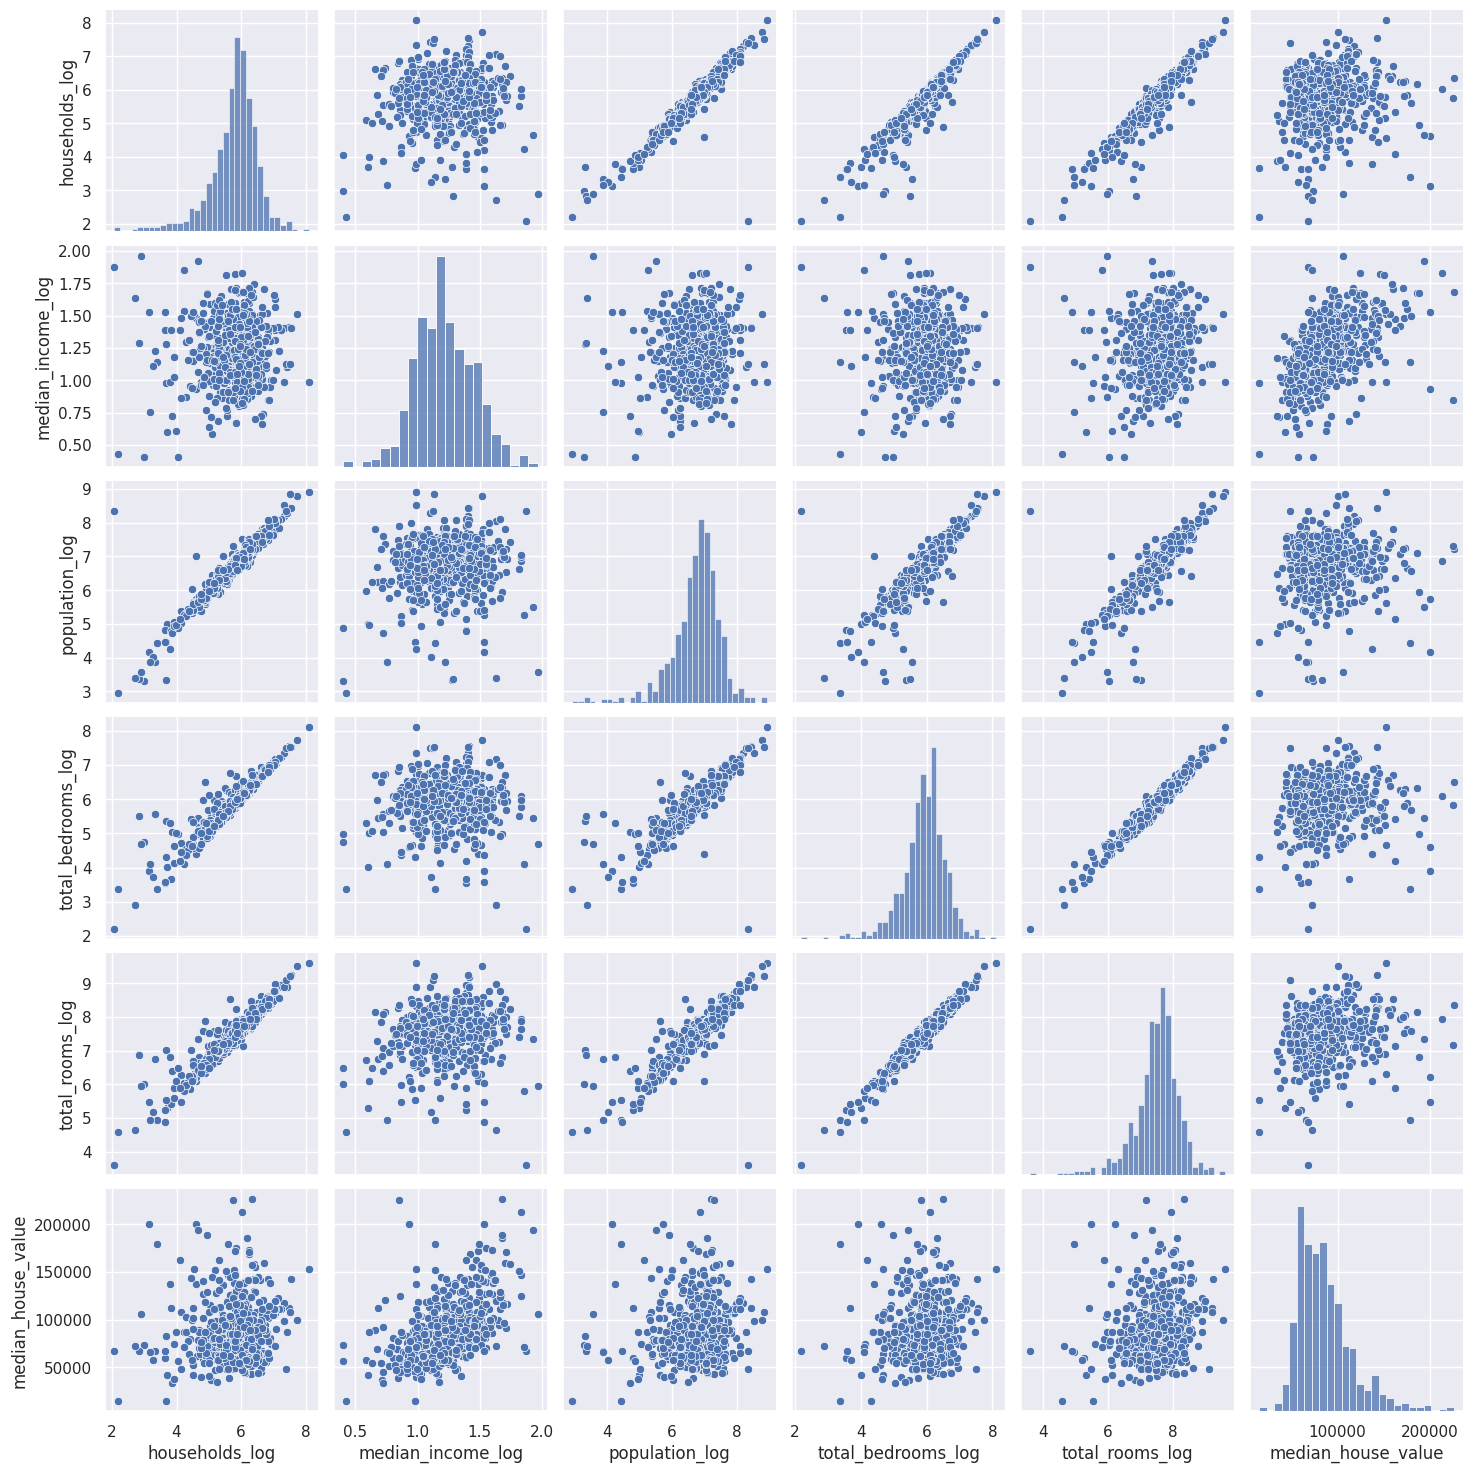

In [ ]:
# Параметры и данные
sns.set()
local_coord = [-122, 41]  # точка, относительно которой определяем порог дистанции
euc_dist_th = 2  # порог расстояния

# Вычисляем евклидово расстояние
euclid_distance = df[['latitude', 'longitude']].apply(
    lambda x: np.sqrt((x['longitude'] - local_coord[0]) ** 2 + (x['latitude'] - local_coord[1]) ** 2), axis=1
)

# Определяем, входит ли точка в порог
indicator = pd.Series(euclid_distance <= euc_dist_th, name='indicator')

print("Data points within threshold:", sum(indicator))

# Визуализация региона
# Заменяем аргументы для lmplot
sns.lmplot(
    x='longitude', y='latitude', data=pd.concat([df, indicator], axis=1),
    hue='indicator', scatter_kws={'marker': '.'}, fit_reg=False, height=5
)

# pairplot
sns.pairplot(df[log_numerical_features+['median_house_value']][indicator])

Мы видим, что на любой локальной территории (вы можете поиграть с параметрами local_coord и euc_dist_th) линейные зависимости между переменными становятся сильнее.

Таким образом, координаты являются очень важным фактором для нашей задачи!

### Визуализация зависимости таргета от координат

<Figure size 1000x1000 with 0 Axes>

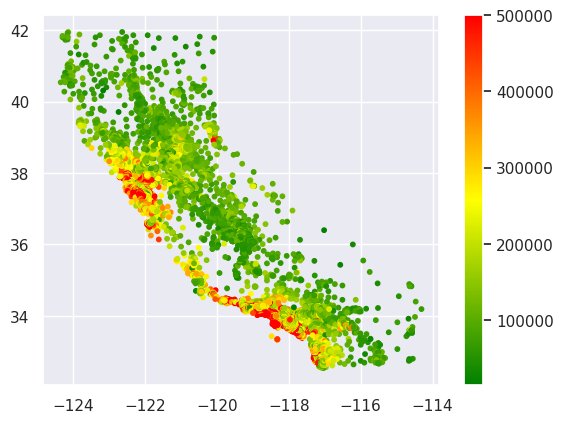

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))

cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])

f, ax = plt.subplots()
points = ax.scatter(df['longitude'], df['latitude'], c=df['median_house_value'],
                    s=10, cmap=cmap)
f.colorbar(points)

Можно заметить, что самые дорогие дома находятся рядом с Сан-Франциско (37.7749° N, 122.4194° W) и Лос-Анджелесом (34.0522° N, 118.2437° W). На основе этого можно использовать расстояние до этих городов в качестве дополнительных признаков.

Мы также видим, что самые дорогие дома расположены приблизительно на прямой линии и становятся дешевле по мере перемещения на северо-восток. Это означает, что линейная комбинация самих координат может быть полезным признаком.

In [ ]:
sf_coord=[-122.4194, 37.7749]
la_coord=[-118.2437, 34.0522]

df['distance_to_SF']=np.sqrt((df['longitude']-sf_coord[0])**2+(df['latitude']-sf_coord[1])**2)

df['distance_to_LA']=np.sqrt((df['longitude']-la_coord[0])**2+(df['latitude']-la_coord[1])**2)